# Analyse death lists

In [30]:
import requests
import pandas as pd
import re
import numpy as np
import os

from bs4 import BeautifulSoup

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

pd.set_option('display.max_rows', 10000)

# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0'}

In [31]:
hiroshima = pd.read_csv('data/hiroshima-cleaned.csv')
nagasaki = pd.read_csv('data/nagasaki-cleaned.csv')
years = pd.read_csv('data/years_conversion.csv')

In [32]:
nagasaki = nagasaki.merge(years, on='year_japan')
nagasaki

,year_japan,male,female,total,accumulated_total,year
0,43,NaN,NaN,26902,26902,1968
1,44,NaN,NaN,12649,39551,1969
2,45,NaN,NaN,2150,41701,1970
3,46,NaN,NaN,2035,43736,1971
4,47,NaN,NaN,1717,45453,1972
5,48,686.0,552.0,1238,46691,1973
6,49,566.0,546.0,1112,47803,1974
7,50,537.0,517.0,1054,48857,1975
8,51,579.0,574.0,1153,50010,1976
9,52,612.0,598.0,1210,51220,1977


In [33]:
hiroshima

,year,male,female,sex_unknown,total,accumulated_total
0,1952,31088,26798,16.0,57902,57902
1,1953,169,220,2.0,391,58293
2,1954,85,126,1.0,212,58505
3,1955,244,279,NaN,523,59028
4,1956,328,333,19.0,680,59708
5,1957,96,89,NaN,185,59893
6,1958,77,96,NaN,173,60066
7,1959,102,80,5.0,187,60253
8,1960,72,89,NaN,161,60414
9,1961,66,73,NaN,139,60553


In [5]:
df = hiroshima.merge(nagasaki, on='year', how='left', suffixes=('_hiroshima', '_nagasaki'))
df.to_csv('data/death_list_complete.csv', index=False)

In [6]:
df[['year', 'accumulated_total_hiroshima', 'accumulated_total_nagasaki']]
df['accumulated_total_all'] = df.accumulated_total_hiroshima + df.accumulated_total_nagasaki

In [7]:
totals_df = df[['year', 'accumulated_total_hiroshima', 'accumulated_total_nagasaki', 'accumulated_total_all']]

totals_df['accumulated_total_all'] = totals_df.accumulated_total_all\
                                    .combine_first(totals_df.accumulated_total_hiroshima)
totals_df

/Users/minami/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,accumulated_total_hiroshima,accumulated_total_nagasaki,accumulated_total_all
0,1952,57902,NaN,57902.0
1,1953,58293,NaN,58293.0
2,1954,58505,NaN,58505.0
3,1955,59028,NaN,59028.0
4,1956,59708,NaN,59708.0
5,1957,59893,NaN,59893.0
6,1958,60066,NaN,60066.0
7,1959,60253,NaN,60253.0
8,1960,60414,NaN,60414.0
9,1961,60553,NaN,60553.0


In [8]:
totals_df.to_csv('data/death_list_redacted.csv', index=False)

# Add dummy rows for 1945-1951

df = pd.read_csv('data/death_list_from1945.csv')
df

,year,accumulated_total_hiroshima,accumulated_total_nagasaki,accumulated_total_all
0,1945,NaN,NaN,NaN
1,1946,NaN,NaN,NaN
2,1947,NaN,NaN,NaN
3,1948,NaN,NaN,NaN
4,1949,NaN,NaN,NaN
5,1950,NaN,NaN,NaN
6,1951,NaN,NaN,NaN
7,1952,57902.0,NaN,57902.0
8,1953,58293.0,NaN,58293.0
9,1954,58505.0,NaN,58505.0


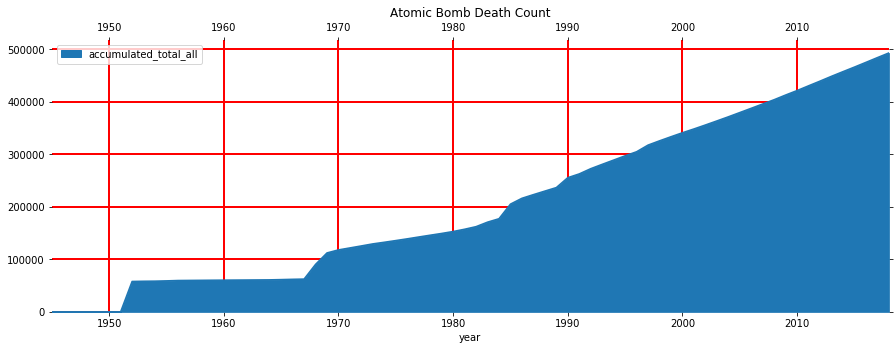

In [9]:
ax = df.plot(kind='area',
                x='year',
                y='accumulated_total_all',
              figsize=(15,5),
            title='Atomic Bomb Death Count')


# When plotting the grid, you can send it options!
ax.grid(color='r', linestyle='-', linewidth=2)

ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top='off',   # ticks along the top edge are off
    left='off', # ticks along the right edge are off
    right='off', # ticks along the right edge are off
    bottom='off', # ticks along the bottom edge are on
    labeltop='on', # top label is on
    labelbottom='on')  # bottom label is on

plt.savefig("charts/death-list.pdf",  bbox_inches='tight')

In [19]:
df['year'] = df.year.astype(object)
df.dtypes

year                            object
accumulated_total_hiroshima    float64
accumulated_total_nagasaki     float64
accumulated_total_all          float64
dtype: object

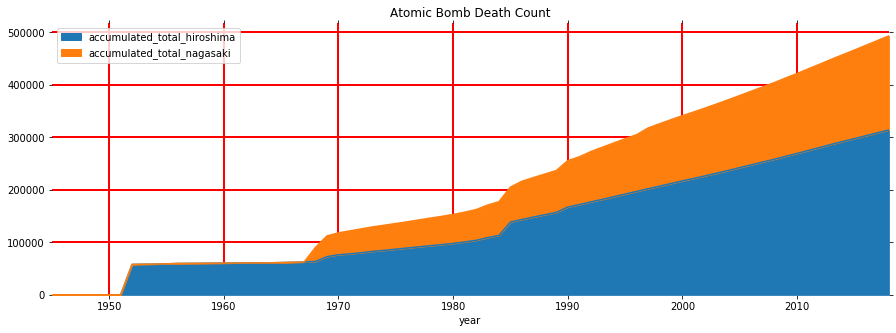

In [29]:
ax = df.plot(kind='area',
                x='year',
                y=['accumulated_total_hiroshima', 'accumulated_total_nagasaki'],
              figsize=(15,5),
             stacked=True,
            title='Atomic Bomb Death Count')


# When plotting the grid, you can send it options!
ax.grid(color='r', linestyle='-', linewidth=2)

ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top='off',   # ticks along the top edge are off
    left='off', # ticks along the right edge are off
    right='off', # ticks along the right edge are off
    bottom='off', # ticks along the bottom edge are on
#     labeltop='on', # top label is on
    labelbottom='on')  # bottom label is on

# ax.set_xticks=([1945,1955,1965,1975,1985,1995,2005,2015])

plt.savefig("charts/deaths-stacked-area.pdf",  bbox_inches='tight')

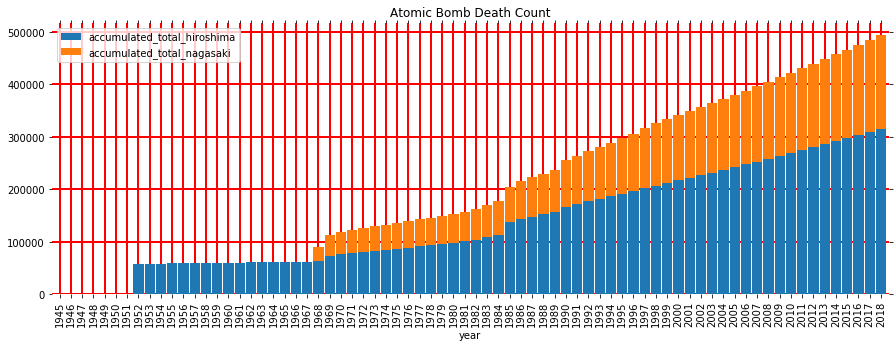

In [25]:
ax = df.plot(kind='bar',
                x='year',
                y=['accumulated_total_hiroshima', 'accumulated_total_nagasaki'],
              figsize=(15,5),
             stacked=True,
             width=0.9,
            title='Atomic Bomb Death Count')


# When plotting the grid, you can send it options!
ax.grid(color='r', linestyle='-', linewidth=2)

ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major', # both major and minor ticks are affected
    top='off',   # ticks along the top edge are off
    left='off', # ticks along the right edge are off
    right='off', # ticks along the right edge are off
    bottom='off', # ticks along the bottom edge are on
#     labeltop='on', # top label is on
    labelbottom='on')  # bottom label is on

# plt.savefig("charts/deaths-stacked.pdf",  bbox_inches='tight')

In 2018: 493,344
    
ZURICH: 385,000
https://www.urbandivercities.eu/zurich/
        
MIAMI: 454,000
https://www.nationsonline.org/oneworld/map/google_map_Miami.htm


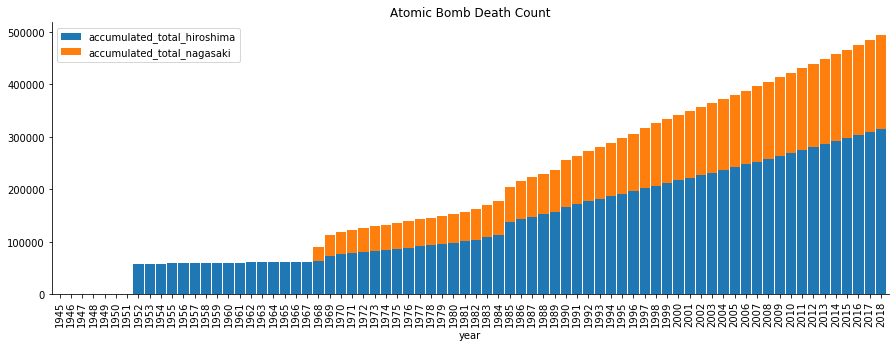

In [37]:
ax = df.plot(kind='bar',
                x='year',
                y=['accumulated_total_hiroshima', 'accumulated_total_nagasaki'],
              figsize=(15,5),
             stacked=True,
             width=0.9,
            title='Atomic Bomb Death Count')


# When plotting the grid, you can send it options!


ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.savefig("charts/deaths-stacked-dummy.pdf",  bbox_inches='tight')